In [3]:
import numpy as np
import sys
sys.path.append('../../dep/orbkit/orbkit')
import orbkit
import matplotlib.pyplot as plt
import scipy.io

In [8]:
qc = orbkit.read.main_read('/mnt/c/Users/guido/workcopies/apdft/apdft-run/order-0/site-all-cc/MOLDEN', itype='molden')

Opened 
	/mnt/c/Users/guido/workcopies/apdft/apdft-run/order-0/site-all-cc/MOLDEN

Loading molden file...


In [32]:
zs = np.linspace(-1, 2, 100)
xs = zs * 0.
ys = zs * 0.
grid = np.vstack((xs, ys, zs)).T

In [35]:
orbkit.grid.x = grid[:, 0]*1.88973
orbkit.grid.y = grid[:, 1]*1.88973
orbkit.grid.z = grid[:, 2]*1.88973
orbkit.grid.is_initialized = True
qc = orbkit.read.main_read('/mnt/c/Users/guido/workcopies/apdft/apdft-run/order-0/site-all-cc/MOLDEN.wfn', itype='wfn')
rho = orbkit.core.rho_compute(qc, numproc=1)

Opened 
	/mnt/c/Users/guido/workcopies/apdft/apdft-run/order-0/site-all-cc/MOLDEN.wfn

Loading wfn file...

Starting the calculation of the density...
The grid has been separated into 1 slices each having 1.00e+04 grid points.
The calculation will be carried out using only one process.

	The number of subprocesses can be changed with -p


There are 102 contracted Cartesian AOs and 7 MOs to be calculated.


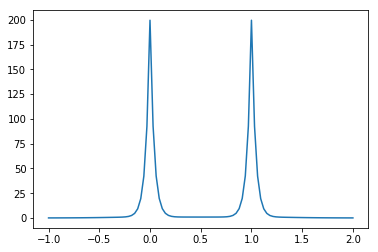

In [36]:
plt.plot(zs, rho)

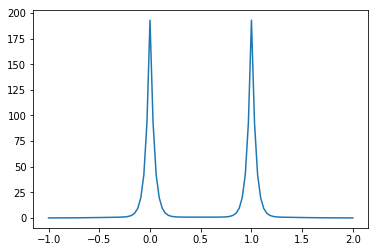

In [31]:
plt.plot(zs, rho)

In [110]:
fh = scipy.io.FortranFile('/mnt/c/Users/guido/workcopies/apdft/apdft-run/order-0/site-all-cc/DENSITY', 'r')
ngrid = fh.read_ints()[0]
fh.read_reals()
#for i in range(ngrid):
#    _ = fh.read_reals()

array([-1.23317021e+01, -4.28288152e+00, -1.93735506e+00,  1.13595254e+01,
        8.26287569e-33,  8.53194883e-32,  2.96320212e-32,  1.44506130e-32,
        9.92400040e-31])

In [111]:
fh.read_reals()

array([-1.20796760e+01, -3.75823928e+00, -1.86851315e+00,  2.14167224e+00,
        7.13787215e-31,  7.21387545e-30,  2.24438719e-30,  1.21042959e-30,
        8.02827270e-29])

In [5]:
with open('/mnt/c/Users/guido/workcopies/apdft/apdft-run/order-0/site-all-cc/DENSITY', 'r') as fh:
    _ = np.fromfile(fh, 'i4')
    q = _[3:-1].view(np.float64)
    ccdensity = q.reshape((-1, 10))[:, 1:]

In [128]:
#_[:1].view(np.int32)
for start in range(10):
    print (start, _[start:start+2].view(np.float64))

0 [1.2303756e-309]
1 [2.8647e-319]
2 [1.69759663e-313]
3 [1.52783697e-312]
4 [-7.03817925e+140]
5 [-12.33170215]
6 [-7.90289394e-71]
7 [-4.28288152]
8 [5.9050552e-285]
9 [-1.93735506]


In [141]:
_[5:5+2*12].view(np.float64)

array([-1.23317021e+001, -4.28288152e+000, -1.93735506e+000,
        1.13595254e+001,  8.26287569e-033,  8.53194883e-032,
        2.96320212e-032,  1.44506130e-032,  9.92400040e-031,
        1.52783697e-312, -1.20796760e+001, -3.75823928e+000])

In [155]:
len(_[5:-1].view(np.float64))

579819

In [153]:
(len(_)-5)/2

579819.5

In [157]:
ngrid*10

579820

In [176]:
np.average(ccdensity[:, 2])

0.9448630627289141

In [178]:
np.sum(ccdensity[:, 3] * ccdensity[:, 4])

13.999998681580916

In [4]:
with open('/mnt/c/Users/guido/workcopies/apdft/apdft-run/order-1/site-0-dn/DENSITY', 'r') as fh:
    _ = np.fromfile(fh, 'i4')
    q = _[3:-1].view(np.float64)
    ccdensity2 = q.reshape((-1, 10))[:, 1:]

In [8]:
np.linalg.norm(ccdensity[:, :3] - ccdensity2[:, :3])

0.0